### 매출 데이터 불러오기

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv('./Raw/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2021년.csv',encoding='euc-kr')

In [17]:
for i in range(2014,2021):
    df_temp=pd.read_csv(f'./Raw/서울시 우리마을가게 상권분석서비스(상권-추정매출)_{i}년.csv',encoding='euc-kr')
    df_temp.columns = df.columns
    df=pd.concat([df,df_temp])

df

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,1000001,계동길,CS100001,한식음식점,316763168,13820,...,204,6283,4828,402,2286,2963,2673,1717,1068,16
1,2021,1,A,골목상권,1000001,계동길,CS100002,중식음식점,39791852,2042,...,11,825,1041,243,629,307,322,269,97,1
2,2021,1,A,골목상권,1000001,계동길,CS100003,일식음식점,60325474,1563,...,136,519,635,0,185,339,242,279,112,2
3,2021,1,A,골목상권,1000001,계동길,CS100004,양식음식점,199448496,4442,...,66,1778,2175,31,1505,1155,439,566,256,3
4,2021,1,A,골목상권,1000001,계동길,CS100005,제과점,165688274,18512,...,676,7523,9187,208,2471,4577,3857,2990,2609,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132316,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300027,섬유제품,971389704,31185,...,856,5768,25417,1111,15614,6853,3873,3166,568,6
132317,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,409610564,9795,...,12,5050,4262,30,2543,3556,1490,930,763,6
132318,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,11920008477,6667,...,0,2753,3914,0,306,634,1455,1520,2752,6
132319,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,2123968546,8062,...,210,3726,3652,84,2400,2154,1469,850,418,8


In [18]:
df.to_csv('./Data/first_target.csv',index=False)

### target 데이터의 컬럼 수 확인하기

In [19]:
len(df.columns)

80

### 컬럼 그룹 지어 분류하기

- 붙이지 위한 종류 : '기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',<br><br>
       '서비스_업종_코드', '서비스_업종_코드_명' <br><br>
- 타겟 데이터 : '분기당_매출_금액' <br><br>
- 나머지 :  '분기당_매출_건수', 
'주중_매출_비율', 
       '주말_매출_비율',<br><br> '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', 
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', <br><br> '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', <br><br>'남성_매출_비율', '여성_매출_비율',<br><br>
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율',<br><br> '주중_매출_금액', '주말_매출_금액',<br><br> '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', <br><br>'시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액',<br><br> '남성_매출_금액',
       '여성_매출_금액',<br><br> '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액',<br><br> '주중_매출_건수',
       '주말_매출_건수',<br><br> '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',<br><br> '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수',<br><br> '남성_매출_건수', '여성_매출_건수',<br><br>
       '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
       '연령대_50_매출_건수', '연령대_60_이상_매출_건수'<br><br>
       '점포수'

In [20]:
df.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

### 상관계수 히트맵 찍어보기

In [21]:
df_corr=df[['분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율','주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
       '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
       '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '점포수']].corr()

In [22]:
df_corr=pd.DataFrame(df_corr['분기당_매출_금액'])

In [23]:
df_corr=df_corr.dropna()
df_corr[df_corr['분기당_매출_금액'] > 0.3]

,분기당_매출_금액
분기당_매출_금액,1.000000
분기당_매출_건수,0.478669
주중_매출_건수,0.454166
주말_매출_건수,0.501259
월요일_매출_건수,0.440011
화요일_매출_건수,0.444044
수요일_매출_건수,0.448963
목요일_매출_건수,0.453367
금요일_매출_건수,0.474409
토요일_매출_건수,0.531929


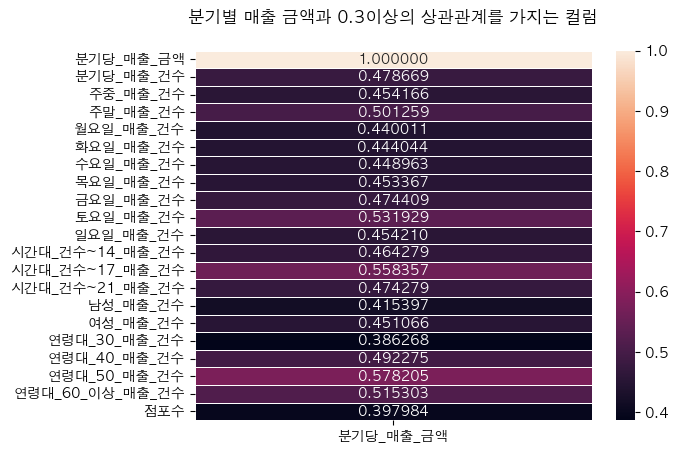

In [24]:
sns.heatmap(
    df_corr[df_corr['분기당_매출_금액'] > 0.3],
    annot=True,
    fmt='f',
    linewidths=0.5
)

plt.title('분기별 매출 금액과 0.3이상의 상관관계를 가지는 컬럼',
          pad=20
          )

plt.show()

> ### 입력 요소로 사용할 수 있는 feature는 점포수가 유일하다고 생각이 되어 그 부분을 제외하고 나머지 부분들은 제외하도록 하겠다.